In [26]:
from __future__ import print_function
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import keras
from os.path import isfile, join
from os import listdir

In [33]:
def calculate_SAD(arr1, arr2):
    """Calculate sum of absolute distance"""
    z = abs(arr1/100 - arr2/100)
    z = z * 100
    return np.sum(z)

def calculate_SSD(arr1, arr2):
    """Calculate sum of squared distance"""
    z = abs(arr1/100 - arr2/100)
    z = z * 100
    return np.sum(z**2)

In [38]:
# Require the following library:
# import matplotlib.pyplot as plt

# Receive np.array, show the image
def show_image(arr, title=""):
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.imshow(np.asarray(arr))
    plt.title(title)

In [28]:
train_path = "AR_Train_image/"
test_path  = "AR_Test_image/"

In [29]:
train_files = [join(train_path, f) for f in listdir(train_path) 
               if isfile(join(train_path, f))]

test_files = [join(test_path, f) for f in listdir(test_path)
               if isfile(join(test_path, f))]

print("{:^3} - {}".format("#", "Filename"))
["{:03} - {}".format(n+1, f) for n, f in enumerate(train_files)]

print("{:^3} - {}".format("#", "Filename"))
["{:03} - {}".format(n+1, f) for n, f in enumerate(test_files)]

 #  - Filename


['001 - AR_Train_image/m-003-01.bmp',
 '002 - AR_Train_image/m-013-04.bmp',
 '003 - AR_Train_image/m-013-10.bmp',
 '004 - AR_Train_image/m-043-09.bmp',
 '005 - AR_Train_image/w-059-11.bmp',
 '006 - AR_Train_image/w-059-05.bmp',
 '007 - AR_Train_image/w-059-04.bmp',
 '008 - AR_Train_image/w-059-10.bmp',
 '009 - AR_Train_image/m-043-08.bmp',
 '010 - AR_Train_image/m-013-11.bmp',
 '011 - AR_Train_image/m-013-05.bmp',
 '012 - AR_Train_image/m-003-02.bmp',
 '013 - AR_Train_image/m-013-13.bmp',
 '014 - AR_Train_image/m-013-07.bmp',
 '015 - AR_Train_image/w-099-08.bmp',
 '016 - AR_Train_image/w-059-06.bmp',
 '017 - AR_Train_image/w-059-12.bmp',
 '018 - AR_Train_image/w-059-13.bmp',
 '019 - AR_Train_image/w-059-07.bmp',
 '020 - AR_Train_image/w-099-09.bmp',
 '021 - AR_Train_image/m-013-06.bmp',
 '022 - AR_Train_image/m-013-12.bmp',
 '023 - AR_Train_image/m-003-03.bmp',
 '024 - AR_Train_image/m-003-07.bmp',
 '025 - AR_Train_image/m-003-13.bmp',
 '026 - AR_Train_image/m-013-02.bmp',
 '027 - AR_T

 #  - Filename


['001 - AR_Test_image/m-003-15.bmp',
 '002 - AR_Test_image/w-099-23.bmp',
 '003 - AR_Test_image/m-043-21.bmp',
 '004 - AR_Test_image/w-089-26.bmp',
 '005 - AR_Test_image/m-043-20.bmp',
 '006 - AR_Test_image/w-099-22.bmp',
 '007 - AR_Test_image/m-003-14.bmp',
 '008 - AR_Test_image/m-003-16.bmp',
 '009 - AR_Test_image/w-099-20.bmp',
 '010 - AR_Test_image/m-043-22.bmp',
 '011 - AR_Test_image/w-089-25.bmp',
 '012 - AR_Test_image/w-089-19.bmp',
 '013 - AR_Test_image/w-089-18.bmp',
 '014 - AR_Test_image/w-089-24.bmp',
 '015 - AR_Test_image/m-043-23.bmp',
 '016 - AR_Test_image/w-099-21.bmp',
 '017 - AR_Test_image/m-003-17.bmp',
 '018 - AR_Test_image/m-013-16.bmp',
 '019 - AR_Test_image/w-099-19.bmp',
 '020 - AR_Test_image/w-099-25.bmp',
 '021 - AR_Test_image/w-059-17.bmp',
 '022 - AR_Test_image/w-089-20.bmp',
 '023 - AR_Test_image/w-059-16.bmp',
 '024 - AR_Test_image/w-089-21.bmp',
 '025 - AR_Test_image/w-099-24.bmp',
 '026 - AR_Test_image/m-043-26.bmp',
 '027 - AR_Test_image/w-099-18.bmp',
 

In [30]:
# train_images = np.array([[[]]])    # this code equals the code below
train_images = np.array([], ndmin=3)

# test_images = np.array([[[]]])    # this code equals the code below
test_images = np.array([], ndmin=3)

img = Image.open("AR_Train_image/m-003-01.bmp")

arr = np.array(img)
print("arr.shape           : {}".format(arr.shape))
print("arr[0, 0, :]        : {}".format(arr[0, 0, :]))
print("img.getpixel((0,0)) : {}".format(img.getpixel((0,0))))
print("arr[1, 0, :]        : {}".format(arr[1, 0, :]))
print("img.getpixel((0,1)) : {}".format(img.getpixel((0,1))))


# for a_file in train_files:
#     img = Image.open(a_file)
#     np.append(train_images, 


arr.shape           : (165, 120, 3)
arr[0, 0, :]        : [31 28 26]
img.getpixel((0,0)) : (31, 28, 26)
arr[1, 0, :]        : [29 25 25]
img.getpixel((0,1)) : (29, 25, 25)


In [48]:
img1 = Image.open("AR_Train_image/m-003-01.bmp")
img2 = Image.open("AR_Train_image/m-003-02.bmp")
img3 = Image.open("AR_Train_image/m-003-03.bmp")
img4 = Image.open("AR_Train_image/m-003-04.bmp")
img5 = Image.open("AR_Train_image/m-003-05.bmp")
arr1 = np.array(img1)
arr2 = np.array(img2)
arr3 = np.array(img3)
arr4 = np.array(img4)
arr5 = np.array(img5)

Sum absolute distance: 958288
Sum squared distance : 134656


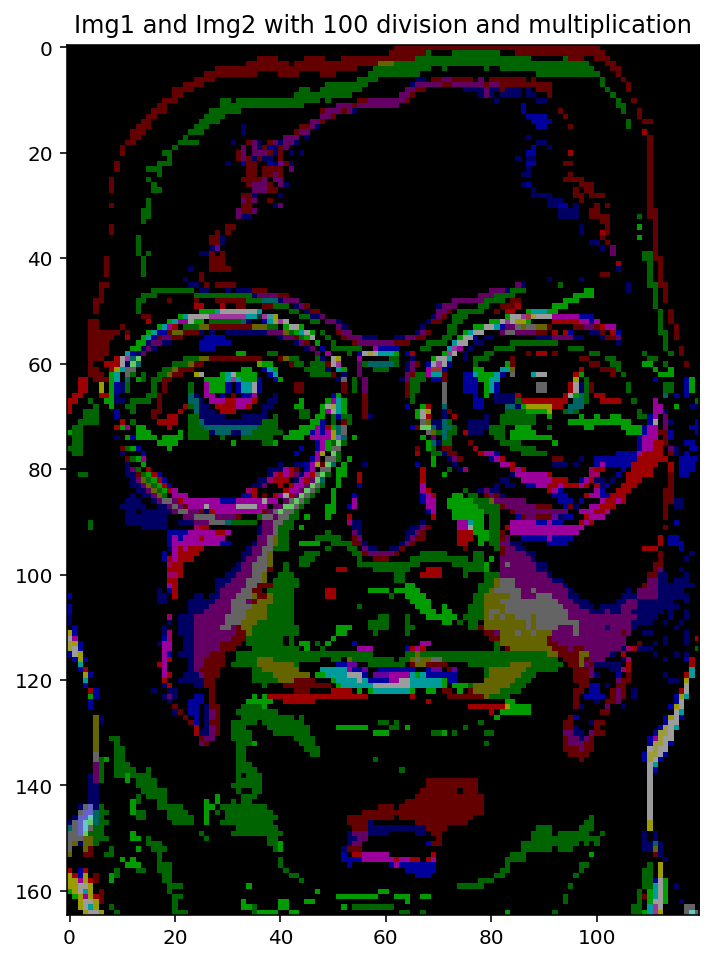

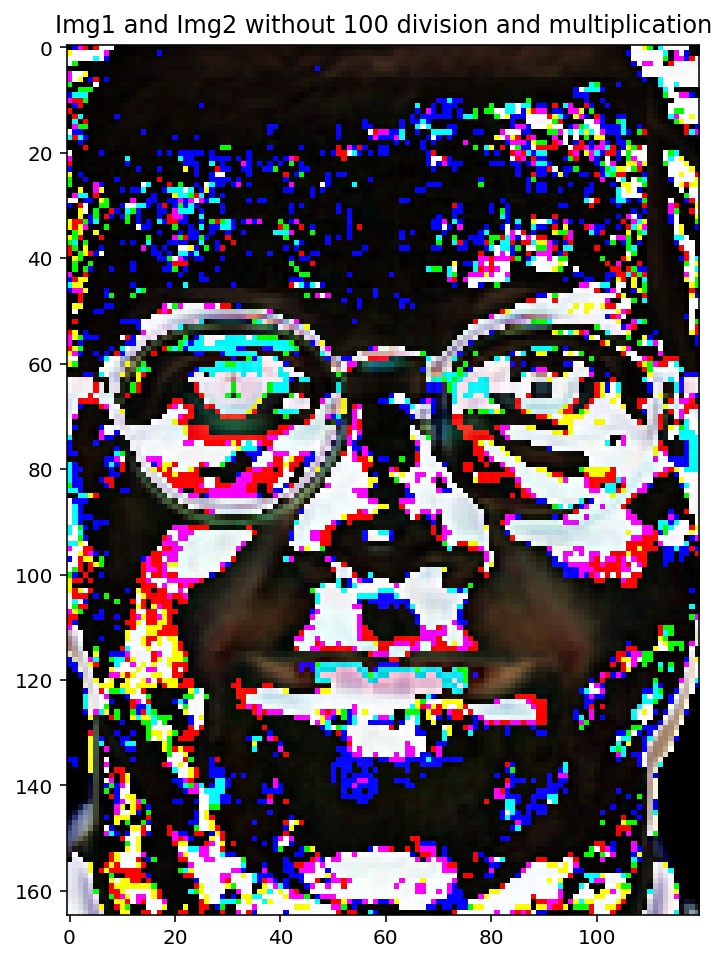

In [49]:
print("Sum absolute distance: {}".format(calculate_SAD(arr1, arr2)))
print("Sum squared distance : {}".format(calculate_SSD(arr1, arr2)))

# With 100 division and multiplication
arr3 = abs(arr1/100 - arr2/100)
arr3 = arr3 * 100
show_image(arr3, "Img1 and Img2 with 100 division and multiplication")

# Without 100 division and multiplication
arr3 = abs(arr1 - arr2)
arr3 = arr3
show_image(arr3, "Img1 and Img2 without 100 division and multiplication")

SSD and SAD shows the difference between image

Sum absolute distance: 0
Sum squared distance : 0


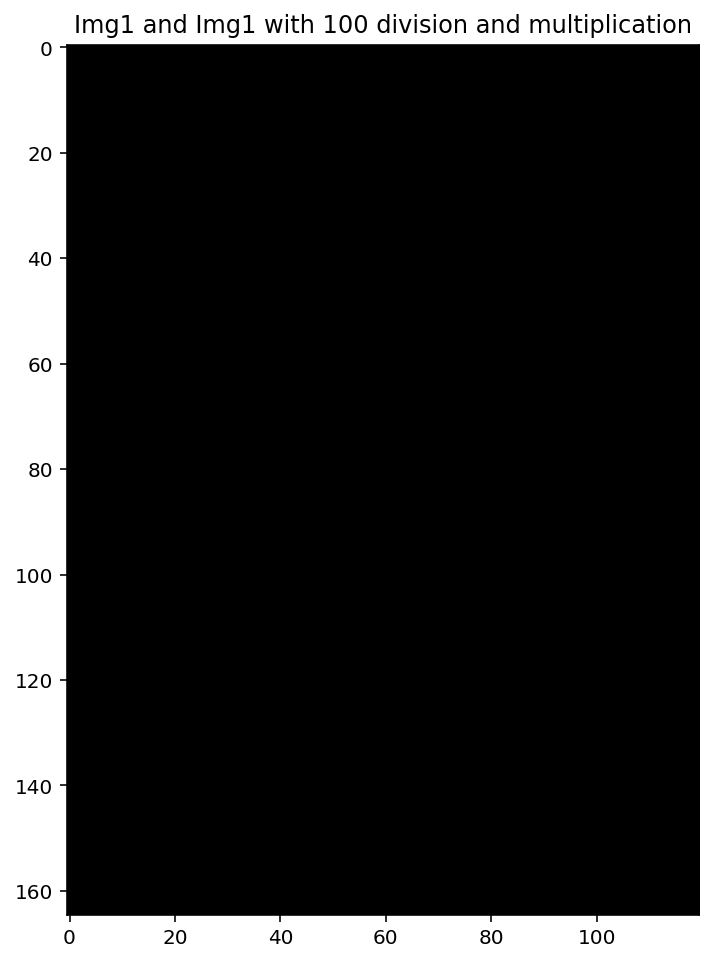

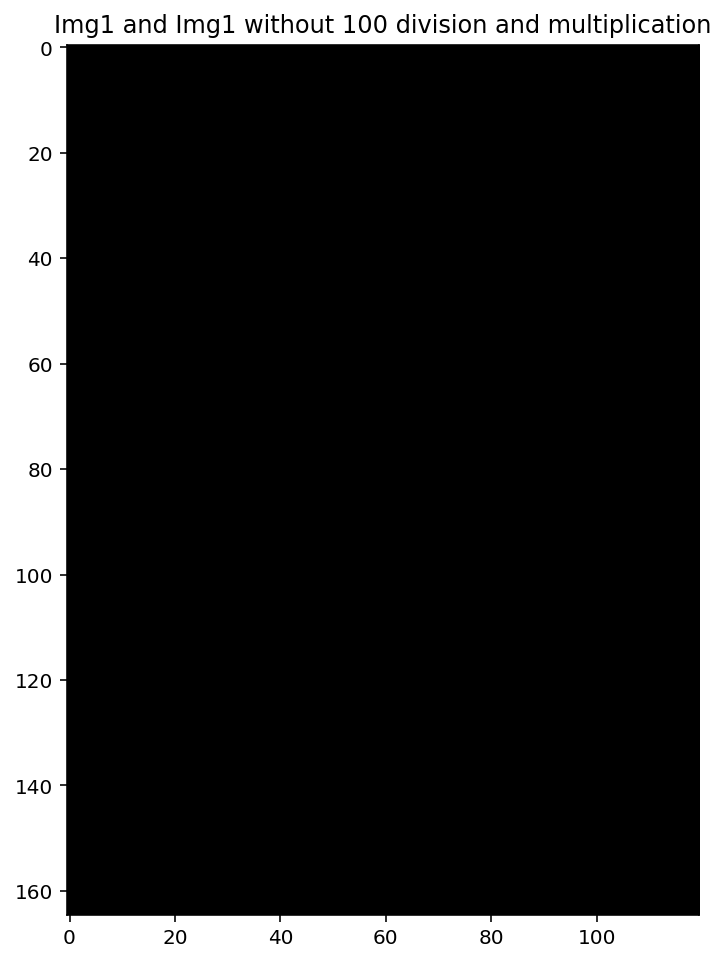

In [50]:
print("Sum absolute distance: {}".format(calculate_SAD(arr1, arr1)))
print("Sum squared distance : {}".format(calculate_SSD(arr1, arr1)))

# With 100 division and multiplication
arr3 = abs(arr1/100 - arr1/100)
arr3 = arr3 * 100
show_image(arr3, "Img1 and Img1 with 100 division and multiplication")

# Without 100 division and multiplication
arr3 = abs(arr1 - arr1)
arr3 = arr3
show_image(arr3, "Img1 and Img1 without 100 division and multiplication")

If the pictures are identical, it shows pitch black since there is no difference

Sum absolute distance: 4168520
Sum squared distance : 538400


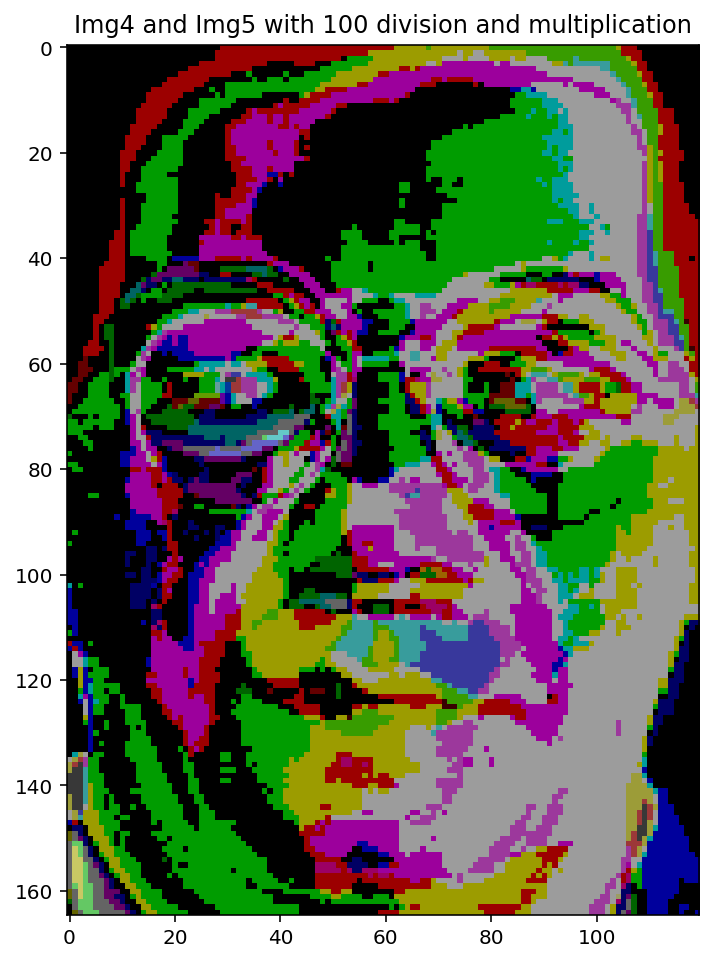

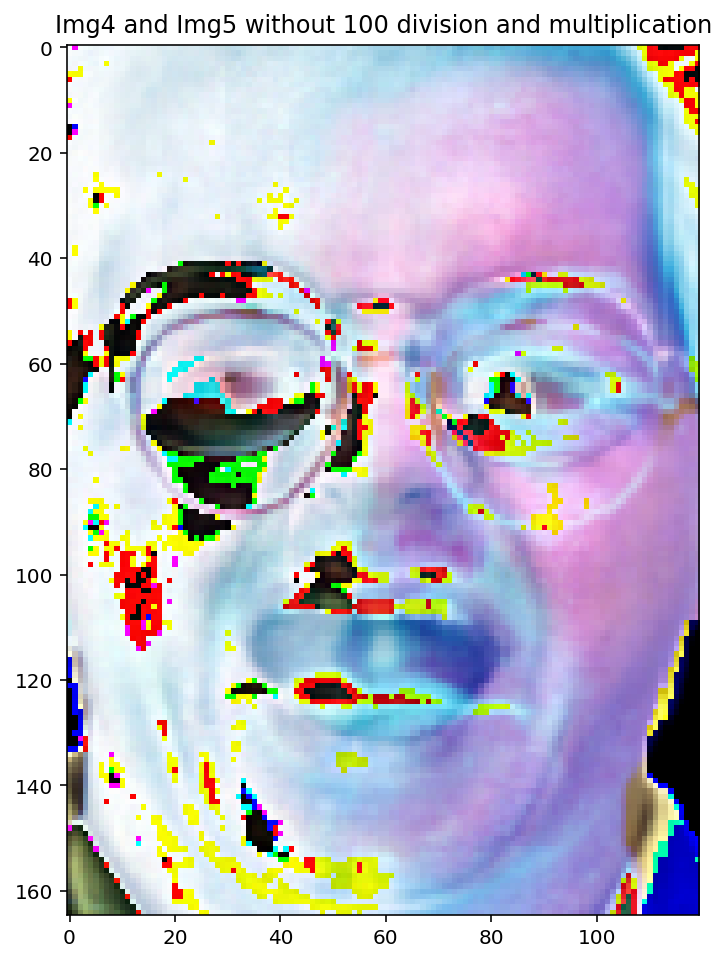

In [52]:
print("Sum absolute distance: {}".format(calculate_SAD(arr4, arr5)))
print("Sum squared distance : {}".format(calculate_SSD(arr4, arr5)))

# With 100 division and multiplication
arr3 = abs(arr4/100 - arr5/100)
arr3 = arr3 * 100
show_image(arr3, "Img4 and Img5 with 100 division and multiplication")

# Without 100 division and multiplication
arr3 = abs(arr4 - arr5)
arr3 = arr3
show_image(arr3, "Img4 and Img5 without 100 division and multiplication")